<a href="https://colab.research.google.com/github/talibilat/Computer-Vision/blob/main/StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%sh
pip install -q --upgrade pip
pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.

In [2]:
from huggingface_hub import notebook_login

# Required to get access to stable diffusion model
notebook_login()

In [3]:
import torch
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, revision="fp16"
)

pipeline = pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [4]:
import os

from IPython.display import Image, display


def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=8,
    output_dir="images",
    display_images=False,
):

    num_iterations = num_images_to_generate // num_images_per_prompt
    os.makedirs(output_dir, exist_ok=True)

    for i in range(num_iterations):
        images = pipeline(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )
        for idx, image in enumerate(images.images):
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"
            image.save(image_name)
            if display_images:
                display(Image(filename=image_name, width=128, height=128))

  0%|          | 0/50 [00:00<?, ?it/s]

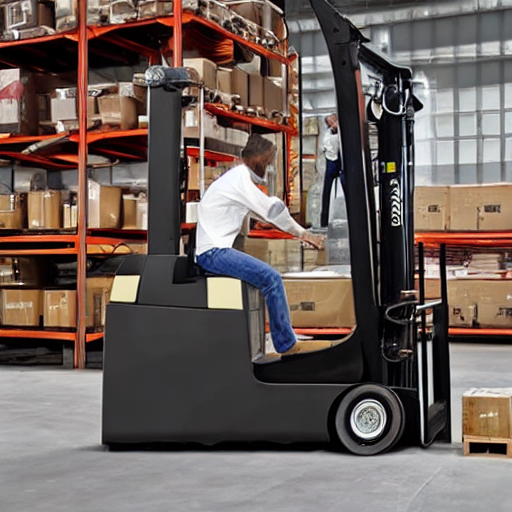

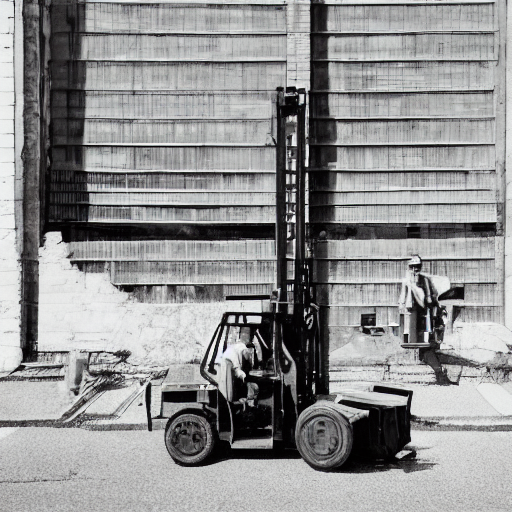

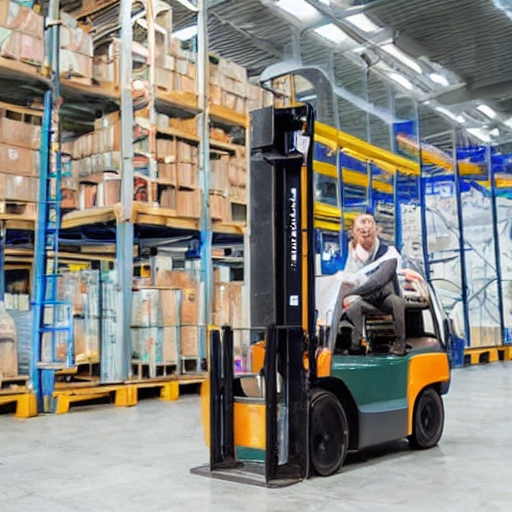

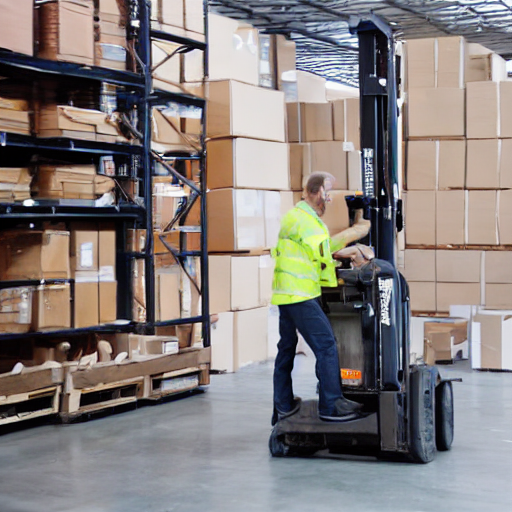

In [6]:
# 1000 images takes a couple hours on a SageMaker Studio Lab GPU instance

generate_images("human on a forklift", 4, guidance_scale=4, display_images=True)



In [7]:
import os
HOME = os.getcwd()
image_dir = os.path.join(HOME, "images", "")

In [9]:
file_path = '/content/images'

In [ ]:
from roboflow import Roboflow
import glob
import os

## DEFINITIONS
# glob params
image_dir = os.path.join(HOME, "images", "")
file_extension_type = ".png"

## INIT
# roboflow pip params
rf = Roboflow(api_key="API KEY")
upload_project = rf.workspace().project("Project")

## MAIN
# glob images
image_glob = glob.glob(image_dir + '/*' + file_extension_type)

# perform upload
for image in image_glob:
    upload_project.upload(image, num_retry_uploads=3)
    print("*** Processing image [" + str(len(image_glob)) + "] - " + image + " ***")